razpoke
prva: pomik=0.0 mm, sila=0.0034 kN
največje popuščanje:  220.14449999999997 kN


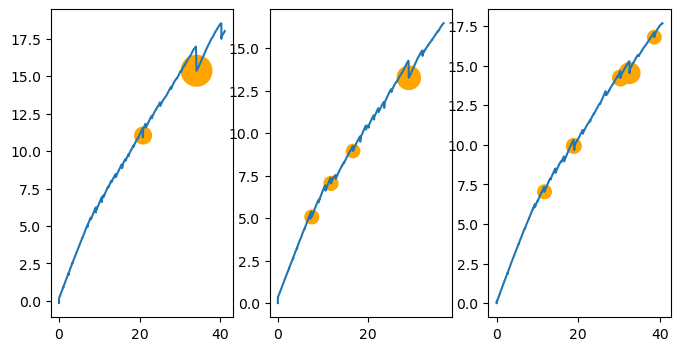

In [36]:
import matplotlib.pyplot as plt

stolpec = 6
doSedaj = 0.0

fig, ax = plt.subplots(1,3, figsize=(8,4))

for stolpec in range(3):
    #obarvani krogi - enostavna rešitev
    doSedaj = 0
    x = []
    y = []
    vr_velikost = []
    vr_sila = []
    vr_pomik = []
    mr_velikost = []
    razpoke_pomik = []
    razpoke_sila = []
    razpoke_velikost = []
    
    with open('akrilat_af.csv', encoding='utf8') as f:
        f.readline() #preskoči vrstico z nazivi stolpcev
        for ln in f:
            ln = ln.strip('\n')
            podatki = ln.split(';')
            sila = podatki[0+stolpec*3].replace(',', '.')
            pomik = podatki[1+stolpec*3].replace(',', '.')

            #prišli smo do konca stolpca - mogoče je drugi stolpec daljši
            if sila != '':
                sila = float(sila)
                pomik = float(pomik)
            
                #dodaj ko delaš graf
                x.append(pomik)
                y.append(sila)


                #za negativne vrednosti sile preskoči
                #neg. sila - gre za umirjanje bata na začetku
                if sila > 0:
                    if doSedaj > sila:
                        vr_sila.append(sila)
                        vr_pomik.append(pomik)
                        vr_velikost.append((doSedaj-sila)*300)
                        if doSedaj-sila > 0.3:
                            razpoke_pomik.append(pomik)
                            razpoke_sila.append(sila)
                            razpoke_velikost.append((doSedaj-sila)*300)
                        #break
                    
                    doSedaj = sila
            else:
                break
    ax[stolpec].plot(x, y) 
    ax[stolpec].scatter(razpoke_pomik, razpoke_sila, s=razpoke_velikost, c='orange')
    #ax[stolpec].bar(razpoke_pomik, razpoke_velikost)

    #ax[2].scatter(vr_pomik, vr_sila, s=vr_velikost)
                
                
print("razpoke")
print(f"prva: pomik={vr_pomik[0]:.4} mm, sila={vr_sila[0]:.4f} kN")
print("največje popuščanje: ", max(vr_velikost), "kN")

 
